<a href="https://colab.research.google.com/github/RoshitRana/Concepts_and_Technology_AI/blob/main/2414227_RoshitRana_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION TASK**

Mount Google Drive

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Loading the file

In [ ]:
# Read the CSV file from Google Drive (adjust path if needed)
data_path = '/content/drive/MyDrive/AI_CourseWork/Classification.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

None

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


 Exploratory Data Analysis (EDA)

Data cleaning and Summary Statistics

In [ ]:
# Encoding categorical variables
categorical_cols = ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Standardizing numerical features
scaler = StandardScaler()
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display processed dataset
df.head()


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


Visualizing the Data

<ipython-input-58-36c75be6ce18>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Obesity", order=df["Obesity"].value_counts().index, palette="viridis")


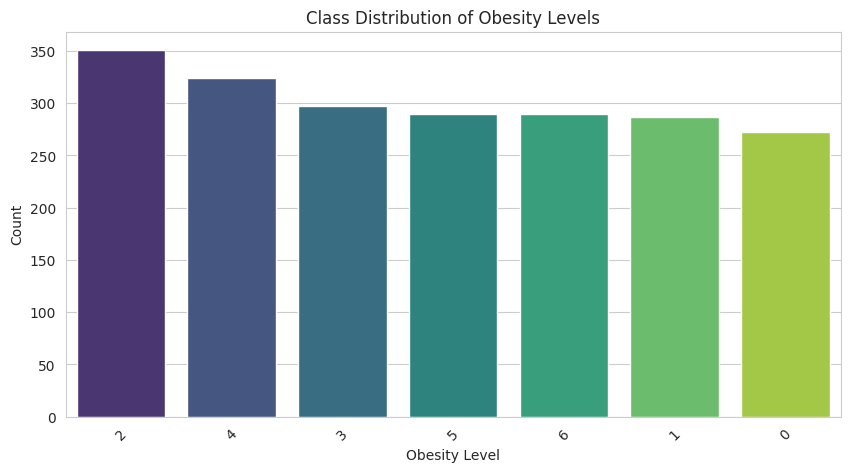

(24,
                Age       Height       Weight         FCVC          NCP  \
 count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
 mean     24.312600     1.701677    86.586058     2.419043     2.685628   
 std       6.345968     0.093305    26.191172     0.533927     0.778039   
 min      14.000000     1.450000    39.000000     1.000000     1.000000   
 25%      19.947192     1.630000    65.473343     2.000000     2.658738   
 50%      22.777890     1.700499    83.000000     2.385502     3.000000   
 75%      26.000000     1.768464   107.430682     3.000000     3.000000   
 max      61.000000     1.980000   173.000000     3.000000     4.000000   
 
               CH2O          FAF          TUE      Obesity  
 count  2111.000000  2111.000000  2111.000000  2111.000000  
 mean      2.008011     1.010298     0.657866     3.015632  
 std       0.612953     0.850592     0.608927     1.952090  
 min       1.000000     0.000000     0.000000     0.000000  
 25%       1.

In [ ]:
# Check for duplicate values
duplicates = df.duplicated().sum()

# Summary statistics for numerical columns
num_summary = df.describe()

# Visualizing class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Obesity", order=df["Obesity"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Class Distribution of Obesity Levels")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.show()

duplicates, num_summary


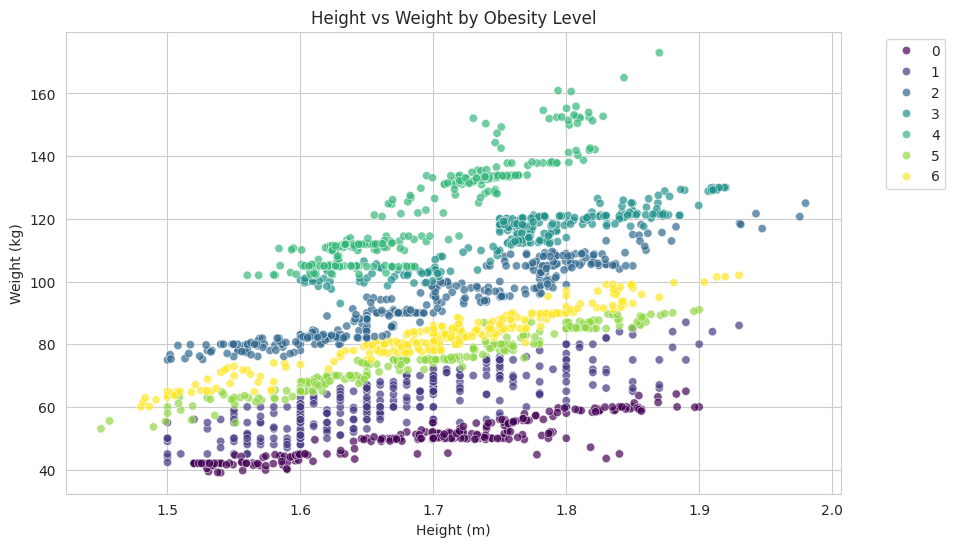

In [ ]:
# Scatter plot for Weight vs Height colored by Obesity level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Height", y="Weight", hue="Obesity", palette="viridis", alpha=0.7)
plt.title("Height vs Weight by Obesity Level")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Logistic Regression from scratch (Binary classification)

In [ ]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]

# Preparing binary classification (Normal vs Overweight)
df_binary = df[df["Obesity"].isin([1, 5])]  # Select two classes
X_binary = df_binary.drop(columns=["Obesity"]).values
y_binary = df_binary["Obesity"].values
y_binary = np.where(y_binary == 1, 0, 1)  # Convert to binary labels (0 and 1)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train Logistic Regression model from scratch
log_reg_scratch = LogisticRegressionScratch(lr=0.01, epochs=2000)
log_reg_scratch.fit(X_train, y_train)

# Predictions and accuracy
from sklearn.metrics import accuracy_score

y_pred_train = log_reg_scratch.predict(X_train)
y_pred_test = log_reg_scratch.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

train_acc, test_acc

(0.8308026030368764, 0.7931034482758621)

Random Forest Classifier to evaluate the performance

In [ ]:
# Train Logistic Regression (sklearn)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

log_reg_acc, rf_acc


(0.9224137931034483, 0.9396551724137931)

Random Forest performed better.
1. Logistic Regression Accuracy: 92.24%
2. Random Forest Accuracy: 93.97%

optimize hyperparameters using GridSearchCV

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters for RF
best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_

best_params_rf, best_score_rf


({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100},
 0.9327021972884525)

1.   Data Processing
2.   Feature Sets
3.   Train-Test Split
4.   Final Model Training
5.   Comparison

In [ ]:
# Encode categorical variables
categorical_cols = ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity"]
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Prepare data for binary classification (Normal vs Overweight)
# (Here we assume that encoded label '1' corresponds to 'Normal Weight' and '5' to 'Overweight_Level_I' from our earlier filtering)
df_binary = df[df["Obesity"].isin([1, 5])]
X_binary = df_binary.drop(columns=["Obesity"])
y_binary = df_binary["Obesity"]
# Convert labels: 1 --> 0 (Normal), 5 --> 1 (Overweight)
y_binary = np.where(y_binary == 1, 0, 1)

# Step 2: Define Feature Sets from Prior Feature Selection

# Features selected by Random Forest (example result)
selected_features_rf = ['NCP', 'FAF', 'TUE', 'Age', 'CH2O', 'Height', 'CAEC', 'Weight']

# Features selected by RFE with Logistic Regression (example result)
selected_features_rfe = ['Gender', 'Height', 'Weight', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC']

# Step 3: Split Data into Training and Testing Sets
X_train_df, X_test_df, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Create training and test sets for each feature selection method:
# For Random Forest selected features:
X_train_rf = X_train_df[selected_features_rf]
X_test_rf = X_test_df[selected_features_rf]

# For RFE selected features:
X_train_rfe = X_train_df[selected_features_rfe]
X_test_rfe = X_test_df[selected_features_rfe]

# Step 4: Train Final Models using Tuned Hyperparameters

# Example tuned hyperparameters (replace these with your optimal ones from GridSearchCV)
# For Random Forest:
tuned_params_rf = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}

# For Logistic Regression:
tuned_params_lr = {'C': 1, 'solver': 'liblinear'}

# --- Using Features from Random Forest Selection ---
# Final Random Forest Model:
final_rf_rf = RandomForestClassifier(**tuned_params_rf, random_state=42)
final_rf_rf.fit(X_train_rf, y_train)
y_pred_rf_rf = final_rf_rf.predict(X_test_rf)
acc_rf_rf = accuracy_score(y_test, y_pred_rf_rf)

# Final Logistic Regression Model:
final_rf_lr = LogisticRegression(**tuned_params_lr, random_state=42)
final_rf_lr.fit(X_train_rf, y_train)
y_pred_rf_lr = final_rf_lr.predict(X_test_rf)
acc_rf_lr = accuracy_score(y_test, y_pred_rf_lr)

# --- Using Features from RFE Selection ---
# Final Random Forest Model:
final_rfe_rf = RandomForestClassifier(**tuned_params_rf, random_state=42)
final_rfe_rf.fit(X_train_rfe, y_train)
y_pred_rfe_rf = final_rfe_rf.predict(X_test_rfe)
acc_rfe_rf = accuracy_score(y_test, y_pred_rfe_rf)

# Final Logistic Regression Model:
final_rfe_lr = LogisticRegression(**tuned_params_lr, random_state=42)
final_rfe_lr.fit(X_train_rfe, y_train)
y_pred_rfe_lr = final_rfe_lr.predict(X_test_rfe)
acc_rfe_lr = accuracy_score(y_test, y_pred_rfe_lr)

# --------------------------
# Step 5: Compare the Results
# --------------------------
print("Performance using features selected by Random Forest:")
print("Random Forest Accuracy:", acc_rf_rf)
print("Logistic Regression Accuracy:", acc_rf_lr)

print("\nPerformance using features selected by RFE:")
print("Random Forest Accuracy:", acc_rfe_rf)
print("Logistic Regression Accuracy:", acc_rfe_lr)

Performance using features selected by Random Forest:
Random Forest Accuracy: 0.9482758620689655
Logistic Regression Accuracy: 0.896551724137931

Performance using features selected by RFE:
Random Forest Accuracy: 0.9568965517241379
Logistic Regression Accuracy: 0.9310344827586207


Final Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Label encode categorical columns
categorical_cols = ["Gender", "family_history", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity"]
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Standardize numerical features
numerical_cols = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# -------------------------------
# Step 2: Prepare Binary Classification Data
# -------------------------------
# For this example, we'll use two obesity classes. Let's choose "Normal_Weight" and "Overweight_Level_I"
# Check available classes:
print("Obesity classes:", label_encoders["Obesity"].classes_)

# Ensure the classes exist; otherwise, adjust accordingly.
if "Normal_Weight" in label_encoders["Obesity"].classes_ and "Overweight_Level_I" in label_encoders["Obesity"].classes_:
    normal_val = label_encoders["Obesity"].transform(["Normal_Weight"])[0]
    overweight_val = label_encoders["Obesity"].transform(["Overweight_Level_I"])[0]
else:
    # If not available, take the first two unique values.
    unique_vals = df["Obesity"].unique()[:2]
    normal_val, overweight_val = unique_vals[0], unique_vals[1]

# Filter for the two classes and create binary labels: 0 for normal, 1 for overweight.
df_binary = df[df["Obesity"].isin([normal_val, overweight_val])].copy()
df_binary["Obesity_binary"] = np.where(df_binary["Obesity"] == normal_val, 0, 1)

# Define features and target
X = df_binary.drop(columns=["Obesity", "Obesity_binary"])
y = df_binary["Obesity_binary"]


# Step 3: Define Feature Selection Sets


selected_features_rf = ['NCP', 'FAF', 'TUE', 'Age', 'CH2O', 'Height', 'CAEC', 'Weight']
selected_features_rfe = ['Gender', 'Height', 'Weight', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC']


# Step 4: Split Data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create subsets for each feature selection method:
X_train_rf = X_train[selected_features_rf]
X_test_rf  = X_test[selected_features_rf]

X_train_rfe = X_train[selected_features_rfe]
X_test_rfe  = X_test[selected_features_rfe]


# Step 5: Train Final Models using Tuned Hyperparameters

tuned_params_rf = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10}
tuned_params_lr = {'C': 1, 'solver': 'liblinear'}

# Define a helper function to evaluate models.
def evaluate_model(y_true, y_pred, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

print("----- Using Features Selected by Random Forest -----")
# Random Forest Model
final_rf_rf = RandomForestClassifier(**tuned_params_rf, random_state=42)
final_rf_rf.fit(X_train_rf, y_train)
y_pred_rf_rf = final_rf_rf.predict(X_test_rf)
evaluate_model(y_test, y_pred_rf_rf, "Random Forest")

# Logistic Regression Model
final_rf_lr = LogisticRegression(**tuned_params_lr, random_state=42)
final_rf_lr.fit(X_train_rf, y_train)
y_pred_rf_lr = final_rf_lr.predict(X_test_rf)
evaluate_model(y_test, y_pred_rf_lr, "Logistic Regression")

print("\n----- Using Features Selected by RFE -----")
# Random Forest Model
final_rfe_rf = RandomForestClassifier(**tuned_params_rf, random_state=42)
final_rfe_rf.fit(X_train_rfe, y_train)
y_pred_rfe_rf = final_rfe_rf.predict(X_test_rfe)
evaluate_model(y_test, y_pred_rfe_rf, "Random Forest")

# Logistic Regression Model
final_rfe_lr = LogisticRegression(**tuned_params_lr, random_state=42)
final_rfe_lr.fit(X_train_rfe, y_train)
y_pred_rfe_lr = final_rfe_lr.predict(X_test_rfe)
evaluate_model(y_test, y_pred_rfe_lr, "Logistic Regression")


Obesity classes: [0 1 2 3 4 5 6]
----- Using Features Selected by Random Forest -----
Random Forest -> Accuracy: 0.9483, Precision: 0.9434, Recall: 0.9434, F1 Score: 0.9434
Logistic Regression -> Accuracy: 0.8966, Precision: 0.8475, Recall: 0.9434, F1 Score: 0.8929

----- Using Features Selected by RFE -----
Random Forest -> Accuracy: 0.9483, Precision: 0.9608, Recall: 0.9245, F1 Score: 0.9423
Logistic Regression -> Accuracy: 0.9310, Precision: 0.8947, Recall: 0.9623, F1 Score: 0.9273
